In [1]:
# importing essential libraries for analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'E:\Ahsan Habib Sunny\DS Study Materials\Trisemester_1\MLDM\MLDM Assignments\tweets.csv')

In [3]:
df.shape

(6444, 28)

In [4]:
df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [5]:
df.isnull().sum()

id                            0
handle                        0
text                          0
is_retweet                    0
original_author            5722
time                          0
in_reply_to_screen_name    6236
in_reply_to_status_id      6242
in_reply_to_user_id        6236
is_quote_status               0
lang                          0
retweet_count                 0
favorite_count                0
longitude                  6432
latitude                   6432
place_id                   6240
place_full_name            6240
place_name                 6240
place_type                 6240
place_country_code         6240
place_country              6240
place_contained_within     6240
place_attributes           6240
place_bounding_box         6240
source_url                    0
truncated                     0
entities                      0
extended_entities          5096
dtype: int64

As most of the features contain high percentage of missing values, I have considered to only use the necessary features.

In [6]:
# Subset of original dataframe after dropping columns containing missing values

df = df[['id','handle','text','is_retweet','time']]
df.head()

,id,handle,text,is_retweet,time
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,2016-09-28T00:22:34
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,2016-09-27T23:45:00
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,2016-09-27T23:26:40
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,2016-09-27T23:08:41
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,2016-09-27T22:30:27


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6444 non-null   int64 
 1   handle      6444 non-null   object
 2   text        6444 non-null   object
 3   is_retweet  6444 non-null   bool  
 4   time        6444 non-null   object
dtypes: bool(1), int64(1), object(3)
memory usage: 207.8+ KB


In [8]:
# Extracting the month from the "time" feature

import datetime as dt

df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].apply(lambda x: x.month)

df[['time','month']]

,time,month
0,2016-09-28 00:22:34,9
1,2016-09-27 23:45:00,9
2,2016-09-27 23:26:40,9
3,2016-09-27 23:08:41,9
4,2016-09-27 22:30:27,9
...,...,...
6439,2016-01-05 03:47:14,1
6440,2016-01-05 03:44:17,1
6441,2016-01-05 03:42:10,1
6442,2016-01-05 03:39:11,1


# Exploratory Data Analysis

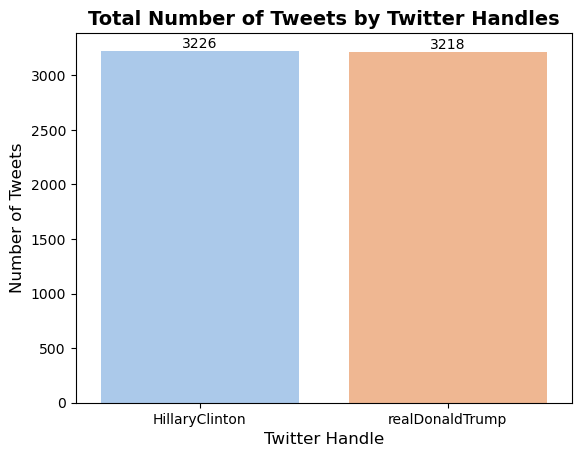

In [9]:
# Total number of tweets by both of the twitter handles
sns.set_palette("pastel")
ax = sns.countplot(x='handle', data=df)
ax.set_xlabel("Twitter Handle", fontsize=12)
ax.set_ylabel("Number of Tweets", fontsize=12)
ax.set_title("Total Number of Tweets by Twitter Handles", fontsize=14, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.show()

Hilary Clinton got only 8 tweets more than Donald Trump. Hilary Clinton got 3226 tweets whereas Donald Trump got 3218 tweets.

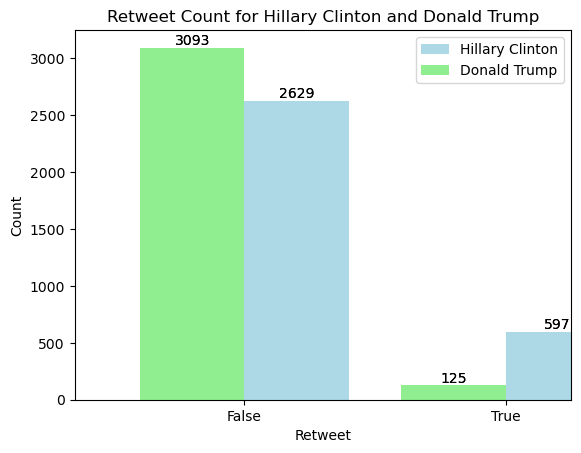

In [10]:
# Retweet count for Hilary Clinton and Donald Trump
# Filter data for Hillary Clinton
hillary_data = df[df['handle'] == 'HillaryClinton']['is_retweet'].value_counts()

# Filter data for Donald Trump
trump_data = df[df['handle'] == 'realDonaldTrump']['is_retweet'].value_counts()

# Create a bar plot for Hillary Clinton
hillary_plot = hillary_data.plot(kind='bar', color='lightblue', position=0, width=0.4, label='Hillary Clinton')

# Create a bar plot for Donald Trump
trump_plot = trump_data.plot(kind='bar', color='lightgreen', position=1, width=0.4, label='Donald Trump')

# Add labels and title
plt.xlabel('Retweet')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Retweet Count for Hillary Clinton and Donald Trump')

# Annotate the bars with their values
for p in hillary_plot.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

for p in trump_plot.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend()

# Show the plot
plt.show()


Clinton's tweets have been more retweeted than Trump's one.

<Axes: title={'center': 'Monthly Tweet Counts'}, xlabel='month'>

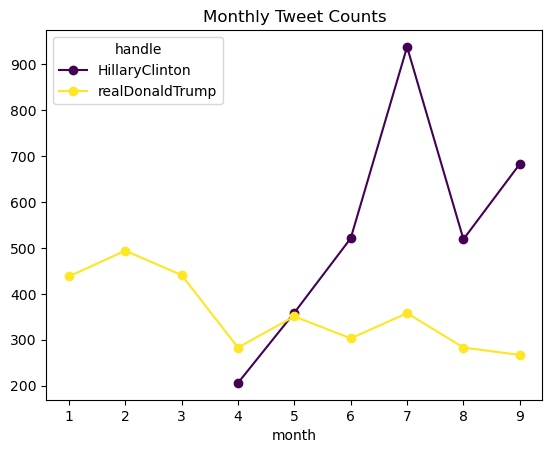

In [11]:
# Number of tweets by months

monthly_tweets = df.groupby(['month', 'handle']).size().unstack()
monthly_tweets.plot(title='Monthly Tweet Counts',colormap='viridis', marker='o', linestyle='-')

Hillary Clinton started getting tweets in April meanwhile Donald Trump started in January. Hence, he got more tweets than Hilary Clinton. 

In [12]:
# Function to find mentions in a tweet
import re

def find_mentions(tweet):
    mentions = re.findall('(\@[a-zA-Z_]+)', tweet)
    return mentions if mentions else []

# Applying the find_mentions function to create a new 'mentions' column
df['mentions'] = df['text'].apply(find_mentions)

# Creating candidate-specific lists for mentions
trump_mentions = [mention for mentions in df.loc[df['handle'] == 'realDonaldTrump', 'mentions'] for mention in mentions]
clinton_mentions = [mention for mentions in df.loc[df['handle'] == 'HillaryClinton', 'mentions'] for mention in mentions]


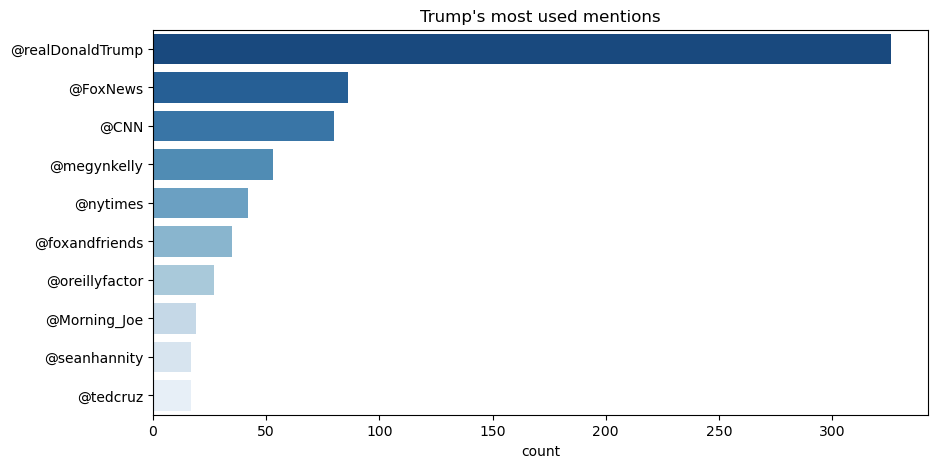

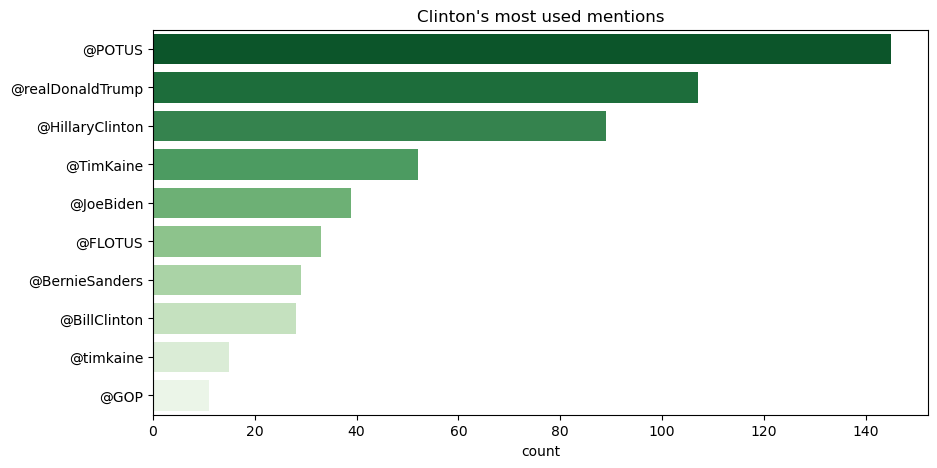

In [13]:
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get top mentions for a candidate
def plot_top_mentions(candidate_mentions, candidate_name, color_palette):
    top_mentions = Series(candidate_mentions).value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_mentions, y=top_mentions.index, palette=color_palette).set_title(f"{candidate_name}'s most used mentions")

# Define different color palettes
trump_color_palette = "Blues_r"
clinton_color_palette = "Greens_r"

# Plot top mentions for Trump with the specified color palette
plot_top_mentions(trump_mentions, "Trump", trump_color_palette)

# Plot top mentions for Clinton with the specified color palette
plot_top_mentions(clinton_mentions, "Clinton", clinton_color_palette)

# Show the plots
plt.show()


Surprinsingly, while Trump was Hillary's 2nd most mentioned account, she was not even on Trump's list.

# Text Mining

In [14]:
import nltk
from nltk.corpus import stopwords
import networkx
from textblob import TextBlob
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator


In [15]:
# Cleaning the unnecessary things from the tweets
def clean_tweets(tweet):
    tweet = re.sub(r':', '', str(tweet))
    tweet = re.sub('co', '', tweet)
    tweet = re.sub('@[A-Za-z0-9]+', '', str(tweet))               
    tweet = re.sub('#', '', str(tweet)) 
    tweet = re.sub('https?://\S+|www\.\S+', '', str(tweet)) 
    tweet = re.sub(r'[^\x00-\x7F]+', ' ', str(tweet))
    tweet = tweet.lower()
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub(r'[^\w\s]', ' ', tweet)
    tweet = re.sub('https', '', tweet)

    return tweet


In [16]:
# tweets after cleaning unnecessary things

df['clean_text'] = df['text'].apply(clean_tweets)

In [17]:
df[['text','clean_text']]

,text,clean_text
0,The question in this election: Who can put the...,the question in this election who can put the ...
1,"Last night, Donald Trump said not paying taxes...",last night donald trump said not paying taxes...
2,Couldn't be more proud of @HillaryClinton. Her...,couldn t be more proud of her vision and mma...
3,"If we stand together, there's nothing we can't...",if we stand together there s nothing we can t...
4,Both candidates were asked about how they'd co...,both candidates were asked about how they d nf...
...,...,...
6439,"""@lilredfrmkokomo: @realDonaldTrump My Faceboo...",my facebook groups are all voting trump p...
6440,"""@marybnall01: @realDonaldTrump watched lowell...",watched lowell mass speech awesome great ...
6441,"""@ghosthunter_lol: Iowa key endorsement for @r...",_lol iowa key endorsement for can t wait for...
6442,"""@iLoveiDevices: @EdwinRo47796972 @happyjack22...",minimizing dependency on china is cruci...


In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(word_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join(word_list)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=800,  
        height=400,  
        random_state=695121,
    ).generate(all_words)
    
    plt.figure(figsize=(10, 8))  # Adjusted figure size for better visualization
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


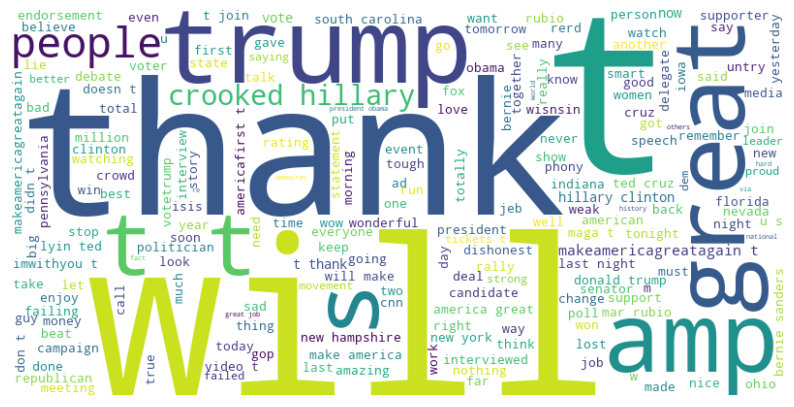

In [19]:
# Word Cloud created from the Donald Trump's tweets

generate_word_cloud(df[df['handle']=='realDonaldTrump']['clean_text'])

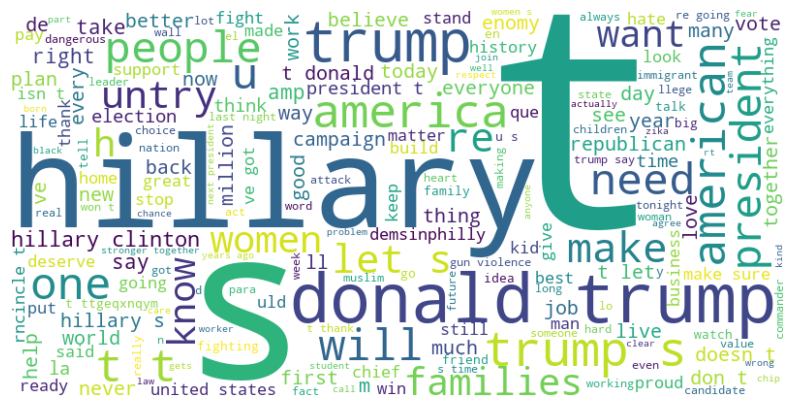

In [20]:
# Word Cloud created from the Hilary Clintons's tweets

generate_word_cloud(df[df['handle']=='HillaryClinton']['clean_text'])

# Sentiment Analysis

In [21]:
# Create a function to get the polarity
def get_polarity(tweet):
    try:
        return TextBlob(tweet).sentiment.polarity
    except:
        return None

# Create a function for sentiment analysis
def sentiment_calculation(tweet):
    try:
        return TextBlob(tweet).sentiment
    except:
        return None

# Create a function to label sentiment analysis
def get_analysis_label(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [22]:
# Sentiment Analysis of Hilary Clinton's tweets

Hilary_Clinton = df[df['handle'] == 'HillaryClinton']

# Create two new columns 'polarity', 'sentiment' & 'analysis label'

Hilary_Clinton['polarity'] = Hilary_Clinton['clean_text'].apply(get_polarity)
Hilary_Clinton['sentiment'] = Hilary_Clinton['clean_text'].apply(sentiment_calculation)
Hilary_Clinton['analysis_label'] = Hilary_Clinton['polarity'].apply(get_analysis_label)


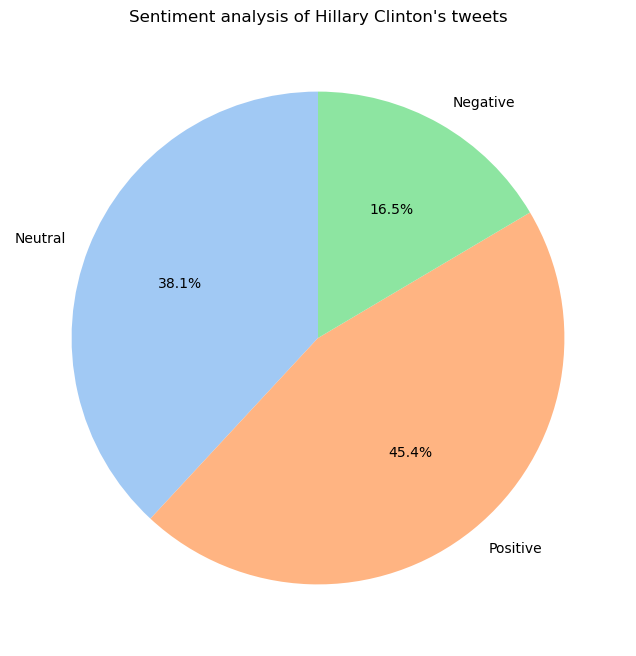

In [23]:
# Pie chart of the Sentiment Analysis
neutral_count = Hilary_Clinton[Hilary_Clinton['analysis_label'] == 'Neutral']['clean_text'].count()
positive_count = Hilary_Clinton[Hilary_Clinton['analysis_label'] == 'Positive']['clean_text'].count()
negative_count = Hilary_Clinton[Hilary_Clinton['analysis_label'] == 'Negative']['clean_text'].count()

labels = ['Neutral', 'Positive', 'Negative']
sizes = [neutral_count, positive_count, negative_count]
colors = sns.color_palette('pastel')[0:3]

plt.figure(figsize=(8, 8))  # Adjusted figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Sentiment analysis of Hillary Clinton's tweets")
plt.show()


In [24]:
# Sentiment Analysis of Donald Trump's tweets

Donald_Trump = df[df['handle'] == 'realDonaldTrump']

# Create two new columns 'polarity', 'sentiment' & 'analysis label'

Donald_Trump['polarity'] = Donald_Trump['clean_text'].apply(get_polarity)
Donald_Trump['sentiment'] = Donald_Trump['clean_text'].apply(sentiment_calculation)
Donald_Trump['analysis_label'] = Donald_Trump['polarity'].apply(get_analysis_label)

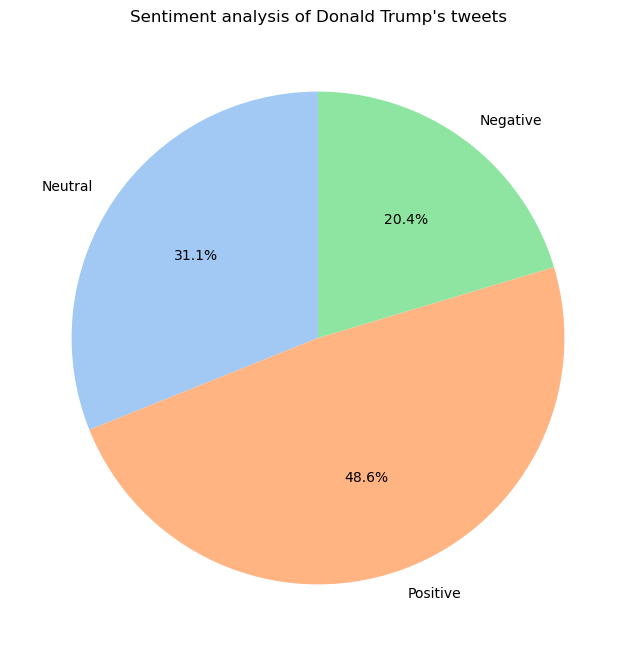

In [25]:
# Pie chart of the Sentiment Analysis
neutral_count = Donald_Trump[Donald_Trump['analysis_label'] == 'Neutral']['clean_text'].count()
positive_count = Donald_Trump[Donald_Trump['analysis_label'] == 'Positive']['clean_text'].count()
negative_count = Donald_Trump[Donald_Trump['analysis_label'] == 'Negative']['clean_text'].count()

labels = ['Neutral', 'Positive', 'Negative']
sizes = [neutral_count, positive_count, negative_count]
colors = sns.color_palette('pastel')[0:3]

plt.figure(figsize=(8, 8))  # Adjusted figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Sentiment analysis of Donald Trump's tweets")
plt.show()
